# Human Weight Prediction with Machine Learning

The objective of this notebook is to predict the Human Weight using Machine Learning algorithms and analyzing them. 

The steps demonstrated in this notebook are:

 1. Loading the data
 2. Familiarizing with data
 3. Visualizing the data
 4. Data Preprocessing & EDA
 5. Splitting the data
 6. Training the data
 7. Model Performance Comparision
 8. Statistical Tests
 9. Conclusion

In [ ]:
#importing required libraries

import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

## 1. Loading Data:

   The dataset is borrowed from Kaggle, https://www.kaggle.com/yersever/500-person-gender-height-weight-bodymassindex. 

   The overview of this dataset is, it has 500 samples with 4 features. Download the dataset from the link provided.

In [ ]:
#Loading data into dataframe

data = pd.read_csv("Person_Gender_Height_Weight_Index.csv")
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


## 2. Familiarizing with Data:
In this step, few dataframe methods are used to look into the data and its features.

In [ ]:
#Shape of dataframe

data.shape

(500, 4)

In [ ]:
#Listing the features of the dataset

data.columns

Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')

In [ ]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [ ]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [ ]:
data.Index.value_counts()

5    198
4    130
2     69
3     68
1     22
0     13
Name: Index, dtype: int64

#### Observations:
1. None of the columns have any missing values. 
2. So no need to remove any column from the dataset.
3. The index feature has 6 unique index groups.
4. The index 5 has more count in dataset.
5. Gender should be encoded.
6. Scale required numerical features.

## 3. Visualizing the data:
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4bdd246c90>,
      dtype=object)

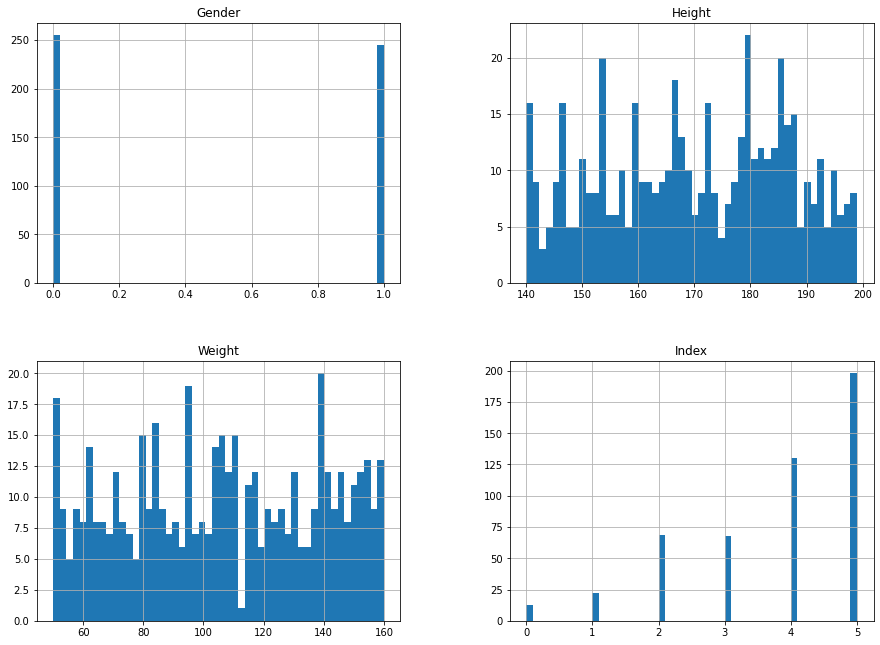

In [75]:
data.hist(bins = 50,figsize = (15,11))

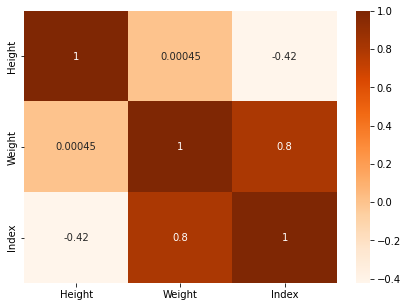

In [ ]:
#Correlation heatmap

plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True, cmap='Oranges')
plt.show()

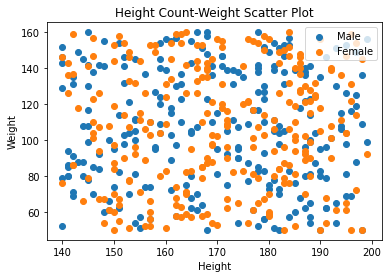

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(data["Height"][data["Gender"]=="Male"],data["Weight"][data["Gender"]=="Male"],label="Male")
plt.scatter(data["Height"][data["Gender"]=="Female"],data["Weight"][data["Gender"]=="Female"],label="Female")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend()
plt.title('Height Count-Weight Scatter Plot')
plt.show()

From above scatter plot, we can conclude that irrespective of gender, weight is not depend on height.

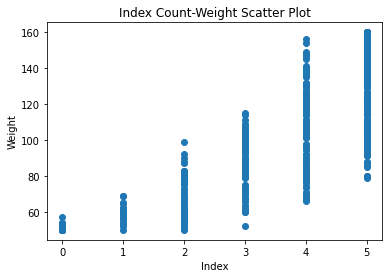

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(data["Index"],data["Weight"])
plt.xlabel("Index")
plt.ylabel("Weight")
plt.title('Index Count-Weight Scatter Plot')
plt.show()

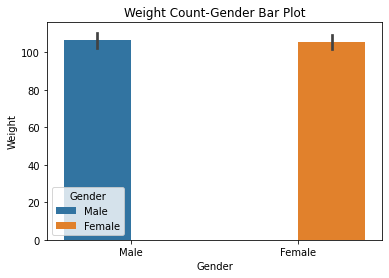

In [ ]:
#Gender and Height count bar plot

plt.figure(figsize=(6,4))
sns.barplot(x = "Gender", y = "Weight", hue = "Gender", data = data)
plt.title('Weight Count-Gender Bar Plot')
plt.show()


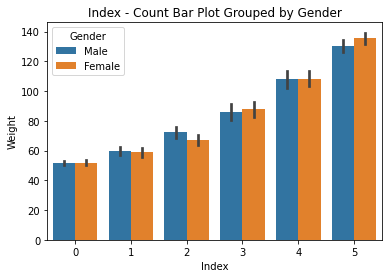

In [ ]:
#Age Group - Count Bar Plot Grouped by Gender

plt.figure(figsize=(6,4))
sns.barplot(x = "Index", y = "Weight", hue = "Gender", data = data)
plt.title("Index - Count Bar Plot Grouped by Gender")
plt.show()

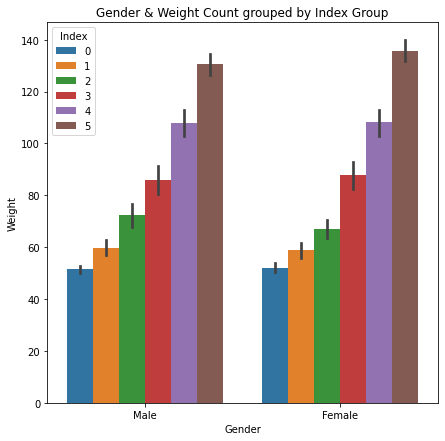

In [ ]:
#Gender & Weight Count grouped by Age Group bar plot

plt.figure(figsize=(7,7))
sns.barplot(x="Gender", y="Weight", hue="Index", data=data)
plt.title('Gender & Weight Count grouped by Index Group')
plt.show()

From the above plot, we can conclude that as index increases weight also increases.

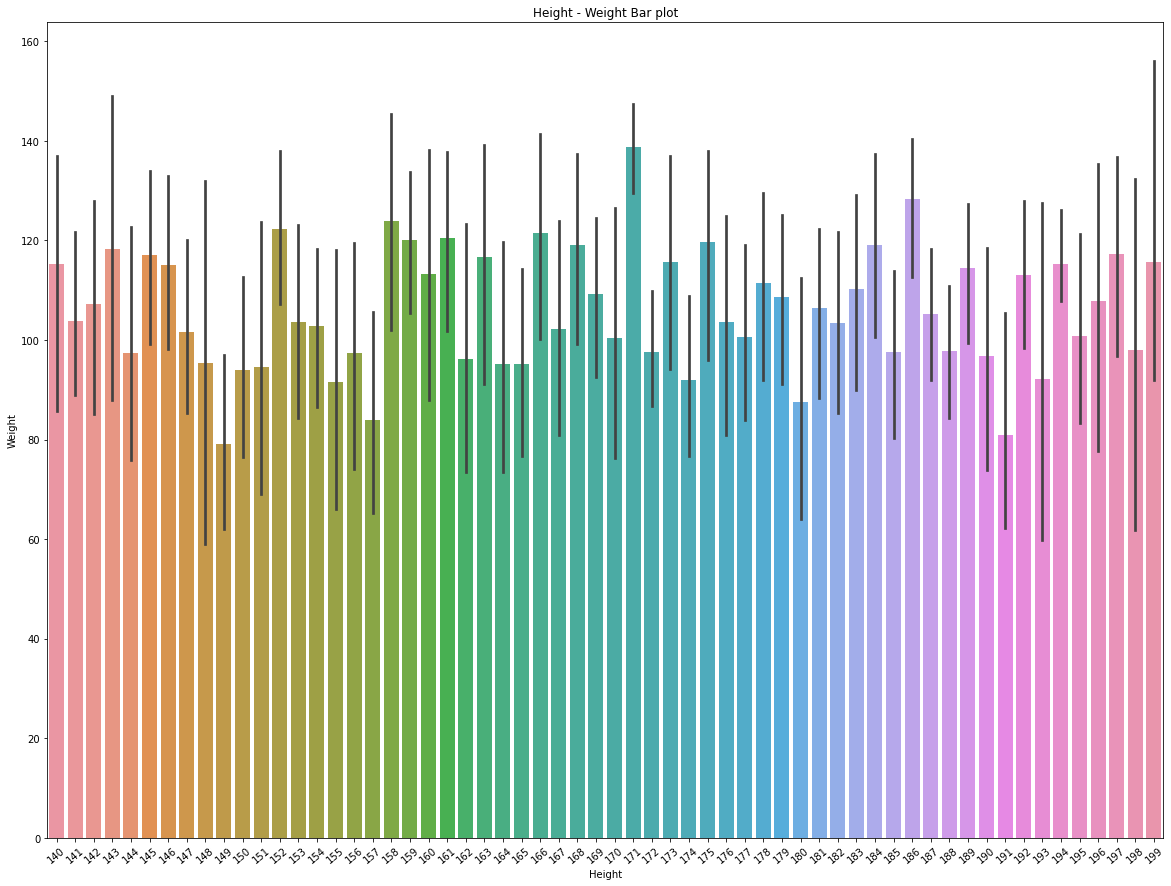

In [ ]:
#Height & Weight

plt.figure(figsize=(20,15))
plot=sns.barplot( x = "Height",y = "Weight", data = data)
plot.set_xticklabels(plot.get_xticklabels(),rotation=40)
plt.title('Height - Weight Bar plot')
plt.show()

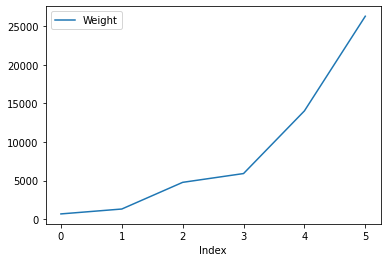

In [ ]:
#Line plpot of Index and Weight

data[['Index','Weight']].groupby(['Index']).sum().plot()

<Figure size 1440x720 with 0 Axes>

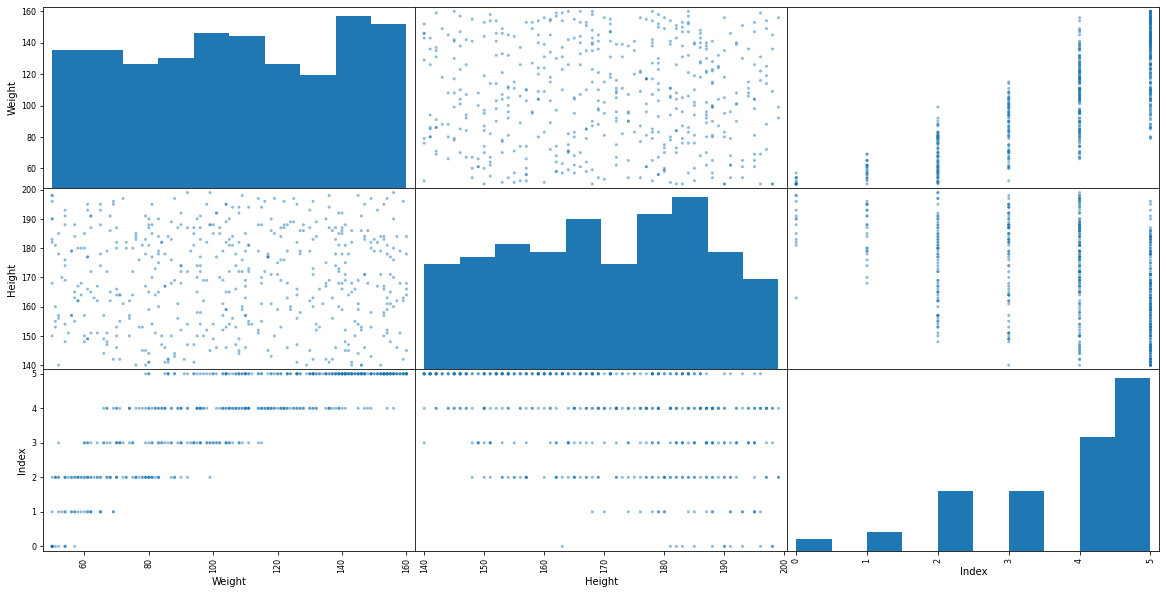

In [ ]:
#Scatter matrix for checking outlier

plt.figure(figsize=(20,10))
attributes = ['Gender', 'Weight', 'Height','Index']
scatter_matrix(data[attributes], figsize=(20,10))
plt.show()


## 4. Data Preprocessing & EDA:
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [ ]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [ ]:
# checking info of data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [ ]:
#checking the data for null or missing values

data.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [ ]:
#droppinf off any null rows (is any)

data = data.dropna()
data.shape

(500, 4)

In [ ]:
#checking for outlier and removing it

data=data.sort_values(by=["Weight"])
q1=data["Weight"].quantile(0.25)
q3=data["Weight"].quantile(0.75)
iqr=q3-q1
lwo=q1-1.5*iqr
upo=q3+1.5*iqr
data=data[(data.Weight<upo)|(data.Weight>lwo)]
data=data.sort_index().reset_index(drop=True)
data.shape

(500, 4)

The non-numerical labeled columns,Gender is to be converted to numerical label that can be done by using SkLearn's LabelEncoder.

In [ ]:
#encoding the categorical features with LabelEncoder

from sklearn.preprocessing import LabelEncoder
le = sklearn.preprocessing.LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [ ]:
#creating a copy of dataset for statistical test

stat_data = data.copy()
stat_data

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3
...,...,...,...,...
495,0,150,153,5
496,0,184,121,4
497,0,141,136,5
498,1,150,95,5


In [ ]:
#Checking the data type of each column

stat_data.dtypes

Gender    int64
Height    int64
Weight    int64
Index     int64
dtype: object

In [ ]:
#Scaling the numerical data columns with RobustScalar

numerical =  ['Gender', 'Weight', 'Height','Index']

from sklearn.preprocessing import RobustScaler

rc = RobustScaler()
stat_data[numerical] = rc.fit_transform(stat_data[numerical])


In [ ]:
stat_data

,Gender,Height,Weight,Index
0,1.0,0.125000,-0.178571,0.0
1,1.0,0.660714,-0.339286,-1.0
2,0.0,0.517857,0.071429,0.0
3,0.0,0.875000,-0.035714,-0.5
4,1.0,-0.767857,-0.803571,-0.5
...,...,...,...,...
495,0.0,-0.732143,0.839286,0.5
496,0.0,0.482143,0.267857,0.0
497,0.0,-1.053571,0.535714,0.5
498,1.0,-0.732143,-0.196429,0.5


## 5. Splitting the Data:
The data is split into train & test sets, 80-20 split.

In [ ]:
# Sepratating & assigning features and target columns to X & y

y = stat_data['Weight']
X = stat_data.drop('Weight',axis=1)
X.shape, y.shape

((500, 3), (500,))

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((400, 3), (100, 3))

## 6. Model Building & Training:
   Supervised machine learning is one of the most commonly used and successful types of machine learning. Supervised learning is used whenever we want to predict a certain outcome/label from a given set of features, and we have examples of features-label pairs. We build a machine learning model from these features-label pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data.

   There are two major types of supervised machine learning problems, called classification and regression. Our data set comes under regression problem, as the prediction of weight is a continuous number, or a floating-point number in programming terms. The supervised machine learning models (regression) considered to train the dataset in this notebook are:

1. Linear Regression
2. k-Nearest Neighbors Regression
3. Random Forest
4. Decision Tree


              
  The metrics considered to evaluate the model performance are Accuracy & Root Mean Squared Error.

In [ ]:
#importing required libraries 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
rmse_train = []
rmse_test = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))
  rmse_train.append(round(c, 3))
  rmse_test.append(round(d, 3))

## 6.1. Linear Regression
   Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear method for regression. Linear regression finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set.

In [ ]:
# Linear regression model 
from sklearn.linear_model import LinearRegression

# instantiate the model
lr = LinearRegression()
# fit the model 
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

#### Performance Evaluation:

In [ ]:
#computing the accuracy of the model performance
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)

Linear Regression: Accuracy on training Data: 0.798
Linear Regression: Accuracy on test Data: 0.747

Linear Regression: The RMSE of the training set is: 0.25932703260614354
Linear Regression: The RMSE of the testing set is: 0.29169819994474455


#### Storing Results:

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Linear Regression', acc_train_lr, acc_test_lr, rmse_train_lr, rmse_test_lr)

Text(0.5, 1.0, 'Actual vs Predicted Trianing data')

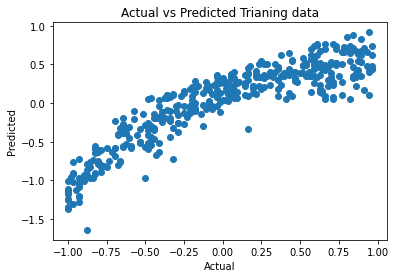

In [ ]:
plt.scatter(y_train,y_train_lr)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Trianing data")

Text(0.5, 1.0, 'Actual vs Predicted Testing data')

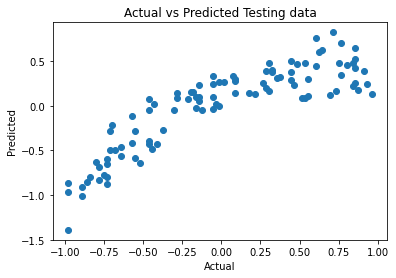

In [ ]:
plt.scatter(y_test,y_test_lr)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Testing data")

#### OBSERVATIONS: 
   The model preformance is good, and we can see that the scores on the training and test sets are very close together. This means we are likely underfitting, not overfitting.



## 6.2. k-Nearest Neighbors Regression:
 K nearest neighbors is a simple algorithm that stores all available cases and predict the numerical target based on a similarity measure (e.g., distance functions). A simple implementation of KNN regression is to calculate the average of the numerical target of the k nearest neighbors.

In [ ]:
# KNN Regression model
from sklearn.neighbors import KNeighborsRegressor

# instantiate the model
knn = KNeighborsRegressor()

param_grid = {'n_neighbors':list(range(1, 31)), 'weights': ['uniform', 'distance']}

# instantiate the grid
knn_grid = GridSearchCV(knn, param_grid , cv=10)

# fit the model 
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']})

In [ ]:
#Checking the best parameters for the model
knn_para = knn_grid.best_params_
print(knn_para)


{'n_neighbors': 12, 'weights': 'uniform'}


In [ ]:
#predicting the target value from the model for the samples
y_train_knn = knn_grid.predict(X_train)
y_test_knn = knn_grid.predict(X_test)

#### Performance Evaluation:

In [ ]:
#computing the accuracy of the model performance
acc_train_knn = knn_grid.score(X_train, y_train) 
acc_test_knn = knn_grid.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_knn))

print("KNN: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("KNN: Accuracy on test Data: {:.3f}".format(acc_test_knn))
print('\nKNN: The RMSE of the training set is:', rmse_train_knn)
print('KNN: The RMSE of the testing set is:', rmse_test_knn)

KNN: Accuracy on training Data: 0.844
KNN: Accuracy on test Data: 0.803

KNN: The RMSE of the training set is: 0.2281230343079974
KNN: The RMSE of the testing set is: 0.25704406239820504


#### Storing Results:

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('k-Nearest Neighbors Regression', acc_train_knn, acc_test_knn, rmse_train_knn, rmse_test_knn)

Evaluating training and testing set performance with different numbers of neighbors from 1 to 30. The plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis.

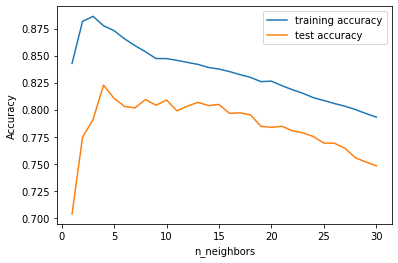

In [ ]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 30
neighbors_settings = range(1, 31)
for n in neighbors_settings:
  # fit the model
  knn = KNeighborsRegressor(n_neighbors=n)
  knn.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(knn.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(knn.score(X_test, y_test))

#plotting the training & testing accuracy for n_neighbours from 1 to 30
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend()

#### OBSERVATIONS:
This discrepancy between performance on the training set and the testing set for n_neighbors < 15
is a clear sign of overfitting. After that, the perfomance is not so great so, moving on to the other models.

## 6.3. Random Forest: Ensemble of Decision Trees
Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

   If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [ ]:
# Random Forest regression model
from sklearn.ensemble import RandomForestRegressor

# instantiate the model
forest = RandomForestRegressor(max_depth=9)

# fit the model 
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=9)

In [ ]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

#### Performance Evaluation:

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = forest.score(X_train, y_train)
acc_test_forest = forest.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_forest = np.sqrt(mean_squared_error(y_train, y_train_forest))
rmse_test_forest = np.sqrt(mean_squared_error(y_test, y_test_forest))

print("Random Forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
print('\nRandom Forest: The RMSE of the training set is: ', rmse_train_forest)
print('Random Forest: The RMSE of the testing set is: ', rmse_test_forest)

Random Forest: Accuracy on training Data: 0.907
Random Forest: Accuracy on test Data: 0.810

Random Forest: The RMSE of the training set is:  0.1759431453957448
Random Forest: The RMSE of the testing set is:  0.25270717588311686


#### Storing Results:

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest',acc_train_forest, acc_test_forest, rmse_train_forest, rmse_test_forest)

Evaluating training and testing set performance with different numbers of max_depth from 1 to 30. The plot shows the training and test set accuracy on the y-axis against the setting of max_depth on the x-axis.

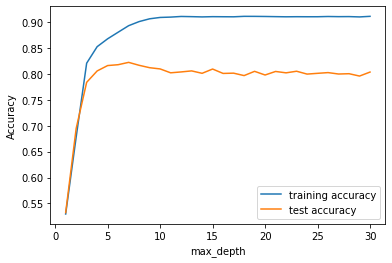

In [ ]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1, 31)
for n in depth:
  # fit the model
  forest = RandomForestRegressor(max_depth=n)
  forest.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(forest.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(forest.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

#### OBSERVATIONS:

The random forest gives us an accuracy of 81.4%, better than the linear models  without tuning any parameters.

## 6.4. Decision Trees: Regression
   Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.

  In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [ ]:
# Decision Tree regression model 
from sklearn.tree import DecisionTreeRegressor

# instantiate the model 
tree = DecisionTreeRegressor(max_depth=6)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6)

In [ ]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

#### Performance Evaluation:

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = tree.score(X_train, y_train)
acc_test_tree = tree.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_tree))

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print('\nDecision Tree: The RMSE of the training set is:', rmse_train_tree)
print('Decision Tree: The RMSE of the testing set is:', rmse_test_tree)

Decision Tree: Accuracy on training Data: 0.872
Decision Tree: Accuracy on test Data: 0.803

Decision Tree: The RMSE of the training set is: 0.20618069959851093
Decision Tree: The RMSE of the testing set is: 0.25759137752272154


#### Storing Results:

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree',acc_train_tree, acc_test_tree, rmse_train_tree, rmse_test_tree)

Evaluating training and testing set performance with different numbers of max_depth from 1 to 30. The plot shows the training and test set accuracy on the y-axis against the setting of max_depth on the x-axis.

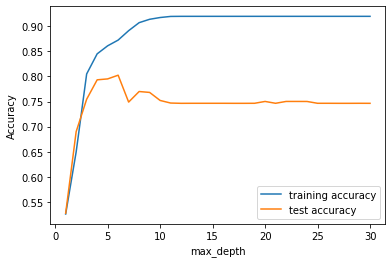

In [ ]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1, 31)
for n in depth:
  # fit the model
  tree = DecisionTreeRegressor(max_depth=n)
  tree.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(tree.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(tree.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

#### Observation:

The model of decision tree is overfit due to which accuracy for training data set comes to be 90% but when testing with test data set it comes to be 80

## 7. Comparision of Models:
   To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Train RMSE': rmse_train,
    'Test RMSE': rmse_test})

In [ ]:
results

,ML Model,Train Accuracy,Test Accuracy,Train RMSE,Test RMSE
0,Linear Regression,0.798,0.747,0.259,0.292
1,k-Nearest Neighbors Regression,0.844,0.803,0.228,0.257
2,Random Forest,0.907,0.810,0.176,0.253
3,Decision Tree,0.872,0.803,0.206,0.258


In [ ]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False).reset_index(drop=True)

,ML Model,Train Accuracy,Test Accuracy,Train RMSE,Test RMSE
0,Random Forest,0.907,0.810,0.176,0.253
1,Decision Tree,0.872,0.803,0.206,0.258
2,k-Nearest Neighbors Regression,0.844,0.803,0.228,0.257
3,Linear Regression,0.798,0.747,0.259,0.292


#### OBSERVATIONS: 
Among all the trained models, Gradient Boosted Regression performance is better. It is understandable because this model is very good in execution Speed & model performance.


## 8. Statistical Tests:
Statistical tests are used in hypothesis testing. They can be used to:

1. determine whether a predictor variable has a statistically significant relationship with an outcome variable.
2. estimate the difference between two or more groups

### 8.1. Test 1: To check the difference in Height between male and female
Using independent sample t-test to check the difference in Height between male and female. The hypothesis statements for this test are:

1. H0: There is no difference in the Height among male and female (Null).
2. H1: There is difference in the Height among male and female (Alternate)

In [ ]:
#collecting male Weight data
male = stat_data['Weight'][stat_data['Gender'] == 1]
male

0     -0.178571
1     -0.339286
4     -0.803571
5     -0.035714
6     -0.250000
         ...   
487   -0.464286
488    0.535714
494   -0.142857
498   -0.196429
499    0.446429
Name: Weight, Length: 245, dtype: float64

In [ ]:
#collecting female Weight data
female = stat_data['Weight'][stat_data['Gender'] == 0]
female

2      0.071429
3     -0.035714
9     -0.053571
11    -0.464286
12    -0.089286
         ...   
492   -1.000000
493   -0.946429
495    0.839286
496    0.267857
497    0.535714
Name: Weight, Length: 255, dtype: float64

In [ ]:
from scipy import stats
ttest,pval = stats.ttest_rel(male[:245], female[:245])

if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Accept null hypothesis


#### Test Conclusion: 
By performing T-test, the result obtained is to accept the null hypothesis. 

This basically means that there is no difference in weight of male & female.

### 8.2. Test 2: To find out the dependence of  Weight on the Height.
Finding out whether there is a dependence of suicide rate on the age using the Chi- Square test. The hypothesis statements for this test are:

1. H0: Weight and Height are independent (Null).
2. H1: Weight and Height are dependent (Alternate).

In [ ]:
#Creating Contingency Table
contingency_table = pd.crosstab(stat_data.Weight, stat_data.Height)

In [ ]:
#Significance Level 5%
alpha=0.05

In [ ]:
chistat, p, dof, expected = stats.chi2_contingency(contingency_table )

In [ ]:
#critical_value
critical_value=stats.chi2.ppf(q=1-alpha,df=dof)
print('critical_value:',critical_value)

critical_value: 6618.674185892114


In [ ]:
print('Significance level: ',alpha)
print('Degree of Freedom: ',dof)
print('chi-square statistic:',chistat)
print('critical_value:',critical_value)
print('p-value:',p) 

Significance level:  0.05
Degree of Freedom:  6431
chi-square statistic: 6594.908755816494
critical_value: 6618.674185892114
p-value: 0.07507057003703878


Here, pvalue = 0.075 and a high pvalue suggests that your sample provides enough evidence that you can retain H0  for the entire population.

In [ ]:
#compare chi_square_statistic with critical_value and p-value which is the 
 #probability of getting chi-square>0.09 (chi_square_statistic)
if chistat>=critical_value:
    print("Reject H0,There is a dependency between Height & Weight.")
else:
    print("Retain H0,There is no relationship between Height & Weight.")
    
if p<=alpha:
    print("Reject H0,There is a dependency between Height & Weight.")
else:
    print("Retain H0,There is no relationship between Height & Weight.")

Retain H0,There is no relationship between Height & Weight.
Retain H0,There is no relationship between Height & Weight.


## 9. Conclusion:
  The final take away form this project is the working of different machine learning models on a dataset and understanding their parameters. Creating this notebook helped me to learn a lot about the parameters of the models, how to tuned them and how they affect the model performance. The final conclusion on the Weight dataset are that the irrespective of Gender and Height. Index 5 is more prone to increase in Weight than remaining index.